# Customer Segmentation

## Import delle librerie e lettura del dataset

In [148]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

In [149]:
df = pd.read_csv('OnlineRetail.csv', encoding='unicode_escape')
df_copy = df.copy()
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


## Esplorazione e preparazione del dataset

Prima di effettuare l'analisi del dataset, c'è necessità di esplorarlo per comprendere se tutto è in regola o se ci sono dei ritocchi da fare per renderlo disponibile all'analisi. 

Inanzitutto si osservano le informazioni riguardanti gli attributi: 
* InvoiceNo - Numero della fattura 
* StockCode - Codice del prodotto
* Description - Nome del prodotto
* Quantity - Quantità di prodotto venduta per transazione
* InvoiceDate - Data della fattura
* UnitPrice - Prezzo di una singola unità di prodotto
* CustomerID - ID del client
* Country - Nome del paese di residenza del cliente

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Si può notare che il dataset presenta 541909 transazioni totali. Si può osservare, inoltre, che per gli attributi __Description__ e __CustomerID__ esistono dei valori nulli.

In [151]:
print('NaN presenti in CustomerID: ' + str(df['CustomerID'].isna().sum()))
print('Nan presenti in Description: ' + str(df['Description'].isna().sum()))

NaN presenti in CustomerID: 135080
Nan presenti in Description: 1454


Esistono 135080 transazioni (pari al 24% dell'intero dataset) in cui non abbiamo informazioni sul cliente finale. Questo è un problema poichè il 24% dei dati presenta informazioni utili che però non sappiamo a chi attribuire. Siccome questi dati non possono essere sfruttati, si decide di eliminarli. Stesso discorso può essere fatto per le transazioni che non presentano descrizione del prodotto. In realtà, la descrizione del prodotto dovrebbe avere un rapporto uno-a-uno con il codice del prodotto, ma ciò è da verificare. Siccome queste transazioni rappresentano il 0,27% del dataset totale, allora la loro eliminazione influisce poco sull'analisi. 

In [152]:
df = df.dropna()
df.reset_index(drop=True, inplace=True)

In [153]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406829 entries, 0 to 406828
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 24.8+ MB


Si noti che __InvoiceDate__ viene trattato come un object, ma si tratta chiaramente di un datetime. 

Si noti che __CustomerID__ viene trattato come un float, ma si tratta chiaramente di un intero. 

In [155]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['CustomerID'] = df['CustomerID'].astype(int)

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406829 entries, 0 to 406828
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int32         
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 23.3+ MB


In [157]:
country_counts = (df.Country.value_counts().head(10) / len(df)) * 100

data = [go.Bar(x=country_counts, 
               y=country_counts.index, 
               orientation='h')]

layout = go.Layout(title='Percentuale di clienti per Paese di provenienza')

fig = go.Figure(data=data, layout=layout)   
py.iplot(fig)   

In [158]:
round(country_counts*100,2).to_frame('% di clienti')

,% di clienti
United Kingdom,8895.09
Germany,233.39
France,208.71
EIRE,183.98
Spain,62.26
Netherlands,58.28
Belgium,50.86
Switzerland,46.14
Portugal,36.38
Australia,30.95


Si noti che circa l'89% dei clienti risiede nel Regno Unito. Si noti che la Germania è seconda per numerosità di clienti, ma presenta solo il 2% di clienti. Ciò lascia intuire che sarebbe ragionevole analizzare i soli clienti del Regno Unito, i quali rappresentano quasi la totalità. 

In [159]:
df = df[df.Country == 'United Kingdom']
df.reset_index(drop=True, inplace=True)
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
361873,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804,United Kingdom
361874,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113,United Kingdom
361875,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113,United Kingdom
361876,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113,United Kingdom
361877,581586,20685,DOORMAT RED RETROSPOT,10,2011-12-09 12:49:00,7.08,13113,United Kingdom


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361878 entries, 0 to 361877
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    361878 non-null  object        
 1   StockCode    361878 non-null  object        
 2   Description  361878 non-null  object        
 3   Quantity     361878 non-null  int64         
 4   InvoiceDate  361878 non-null  datetime64[ns]
 5   UnitPrice    361878 non-null  float64       
 6   CustomerID   361878 non-null  int32         
 7   Country      361878 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 20.7+ MB


Bisogna verificare se ci sono duplicati.

In [161]:
df[df.duplicated(keep=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
449,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908,United Kingdom
453,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908,United Kingdom
458,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908,United Kingdom
481,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908,United Kingdom
485,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908,United Kingdom
...,...,...,...,...,...,...,...,...
361723,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446,United Kingdom
361737,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446,United Kingdom
361740,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446,United Kingdom
361747,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446,United Kingdom


Ci sono 9914 duplicati in totale. Di questi duplicati ci interessa mantenere una sola istanza, ovvero quella inserita più recentemente. 

In [162]:
df[df.duplicated(keep='last')].shape

(5150, 8)

In totale devono essere eliminate 5150 transazioni poichè già presenti almeno una volta nel dataset.

In [163]:
df = df.drop_duplicates(keep='last')
df.reset_index(drop=True, inplace=True)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356728 entries, 0 to 356727
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    356728 non-null  object        
 1   StockCode    356728 non-null  object        
 2   Description  356728 non-null  object        
 3   Quantity     356728 non-null  int64         
 4   InvoiceDate  356728 non-null  datetime64[ns]
 5   UnitPrice    356728 non-null  float64       
 6   CustomerID   356728 non-null  int32         
 7   Country      356728 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 20.4+ MB


Si conta il numero di valori univoci degli attributi.

In [165]:
print('Numero totale di clienti: ' + str(df.CustomerID.unique().shape[0]))
print('Numero totale di prodotti descritti per codice: ' + str(df.StockCode.unique().shape[0]))
print('Numero totale di prodotti descritti testualmente: ' + str(df.Description.unique().shape[0]))
print('Numero totale di fatture: ' + str(df.InvoiceNo.unique().shape[0]))

Numero totale di clienti: 3950
Numero totale di prodotti descritti per codice: 3661
Numero totale di prodotti descritti testualmente: 3860
Numero totale di fatture: 19857


Si osservi che il numero di prodotti descritti per codice ed il numero di prodotti descritti per testo sono diversi. Ciò vuol dire che ad uno stesso prodotto descritto per codice può essere associata una descrizione testuale diversa. Per tale motivo, sia il codice che la descrizione del prodotto dovranno essere sempre considerati insieme per non generare incrompensioni.

## RFM Segmentation

RMF sta per __Recency__, __Frequency__, e __Monetary__. L'analisi RFM è una tecnica utilizzata per generare e assegnare un punteggio ad ogni cliente sulla base di quanto recente è stata la sua ultima transazione (Recency), quante transazioni ha fatto (Frequency), e quale è stato il valore monetario delle sue transazioni (Monetary). 

Tale analisi aiuta a rispondere alle domande del tipo: 
* Chi è il cliente più recente? 
* Quante volte ha acquistato i nostri prodotti?
* Qual è il valore totale dei suoi acquisti?

Innanzitutto bisogna calcolare l'importo per ogni transazione, ovvero il prodotto tra la quantità di prodotto acquistata ed il suo prezzo. 

In [166]:
df['Amount'] = df.Quantity * df.UnitPrice
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


Ai fini dell'analisi bisogna verificare se nel dataset ci sono importi negativi o nulli. 

In [167]:
print('Numero di transazioni con importo totale nullo: ' + str(df[df['Amount'] == 0].shape[0]))
print('Numero di transazioni con importo totale negativo: ' + str(df[df['Amount'] < 0].shape[0]))

Numero di transazioni con importo totale nullo: 24
Numero di transazioni con importo totale negativo: 7501


Il dataset presenta 24 importi nulli e 7501 importi negativi. Probabilmente gli importi nulli sono relativi a prodotti gratuiti, mentre gli importi totali negativi potrebbero riferirsi a transazioni annullate. Informazioni su transazioni cancellate non vengono fornite dalla descrizione del dataset, ma quasi sicuramente la lettera C che precede il numero di fattura sta per "Cancelled". 

In [168]:
df[df['Amount'] <= 0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
121,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom,-27.50
134,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom,-4.65
201,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,-19.80
202,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96
203,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96


Siccome l'analisi si basa su acquisti andati a buon fine, è necessario eliminare le istanze che si riferiscono ad importi negativi. Inoltre, siccome nell'analisi RFM compare la M di Monetary, bisogna eliminare anche gli importi nulli in quanto potrebbero influire sul tasso di frequency o recency. Ad esempio, se un cliente acquista sfruttando le offerte di prodotti gratuiti, è evidente che quel cliente non fornisce alcun valore monetario. 

In [169]:
df = df[~(df['Amount'] <= 0)]
print('Numero di transazioni con importo totale non positivo: ' + str(df[df['Amount'] <= 0].shape[0]))
df.reset_index(drop=True, inplace=True)

Numero di transazioni con importo totale non positivo: 0


In [170]:
df.Amount.describe().to_frame()

,Amount
count,349203.000000
mean,20.861862
std,328.417275
min,0.001000
25%,4.200000
50%,10.200000
75%,17.850000
max,168469.600000


Per creare la variabile __Recency__ bisogna scegliere un data di riferimento. Supponendo di lavorare su dati di transazioni raccolti fino a ieri, possiamo considerare come data di riferimento dell'analisi quella relativa all'ultima transazione (raccolta nel dataset) a cui sommiamo un giorno. In questo modo si considera la data dell'analisi (presente) pari alla data di riferimento.

In [171]:
print('Data dell\'ultima transazione effettuata: ' + str(df.InvoiceDate.max()))

Data dell'ultima transazione effettuata: 2011-12-09 12:49:00


La data dell'ultima transazione risale al 09/12/2011, pertanto si suppone che la data odierna sia il 10/12/2011 e si imposta tale data come data di riferimento per l'analisi. 

In [172]:
import datetime

ref_date = df.InvoiceDate.max() + datetime.timedelta(days=1)
print('Data di riferimento: ' + str(ref_date))

Data di riferimento: 2011-12-10 12:49:00


Considerando un singolo cliente, si ha che:
* __Recency__ è la differenza della data di riferimento e la data relativa all'ultima transazione. 
* __Frequency__ è il conteggio del numero di transazioni. 
* __Monetary__ è la somma di tutti i valori della variabile __Amount__. 

In [173]:
df_rfm = df.groupby(['CustomerID'], as_index=False).agg({
    'InvoiceDate': lambda x: (ref_date - x.max()).days,
    'InvoiceNo': 'count',
    'Amount': 'sum'}).rename(columns = {'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'Amount': 'Monetary'})

In [174]:
df_rfm.loc[:,'Recency':'Monetary'].describe()

,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000
mean,92.208418,89.082398,1858.424654
std,99.533854,214.034542,7478.631256
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,298.185000
50%,51.000000,40.000000,644.975000
75%,143.000000,98.000000,1571.285000
max,374.000000,7676.000000,259657.300000


C:\Users\mimmo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\mimmo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\mimmo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



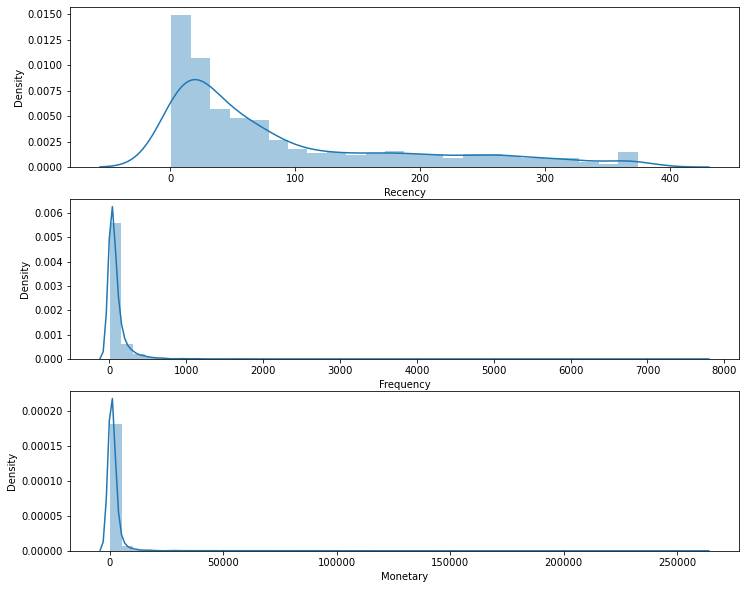

In [175]:
plt.figure(figsize=(12,10))

plt.subplot(3, 1, 1); sns.distplot(df_rfm['Recency'])
plt.subplot(3, 1, 2); sns.distplot(df_rfm['Frequency'])
plt.subplot(3, 1, 3); sns.distplot(df_rfm['Monetary'])
plt.show()

<AxesSubplot:>

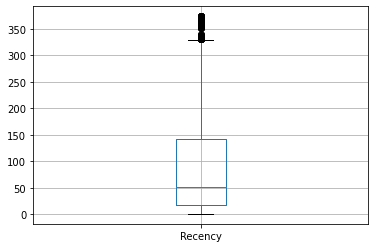

In [176]:
df_rfm.boxplot(column='Recency')

<AxesSubplot:>

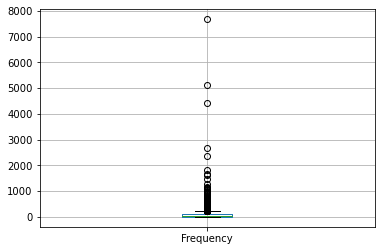

In [177]:
df_rfm.boxplot(column='Frequency')

<AxesSubplot:>

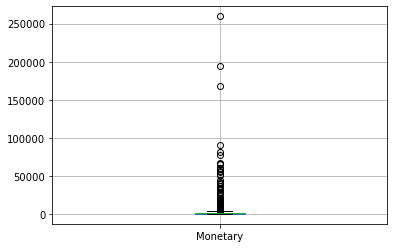

In [178]:
df_rfm.boxplot(column='Monetary')

I grafici mostrati sopra descrivono delle distribuzioni asimmetriche positive, ovvero delle distribuzioni che presentano delle code verso destra. Ai fini dell'analisi si desidera lavorare con delle distribuzioni quanto più normali possibile. Approfittando della positività dei valori in gioco è possibile applicare un trasformazione logaritmica, che in questi casi tende a restituire delle distribuzioni normali.

In [179]:
df_rfm_log = df_rfm.copy()
df_rfm_log['Recency'] = np.log(df_rfm['Recency'])
df_rfm_log['Frequency'] = np.log(df_rfm['Frequency'])
df_rfm_log['Monetary'] = np.log(df_rfm['Monetary'])
df_rfm_log

,CustomerID,Recency,Frequency,Monetary
0,12346,5.786897,0.000000,11.253942
1,12747,0.693147,4.634729,8.341889
2,12748,0.000000,8.392083,10.405873
3,12749,1.386294,5.293305,8.316515
4,12820,1.098612,4.077537,6.848366
...,...,...,...,...
3915,18280,5.627621,2.302585,5.196285
3916,18281,5.198497,1.945910,4.392224
3917,18282,2.079442,2.484907,5.182064
3918,18283,1.386294,6.580639,7.623412


C:\Users\mimmo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\mimmo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\mimmo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



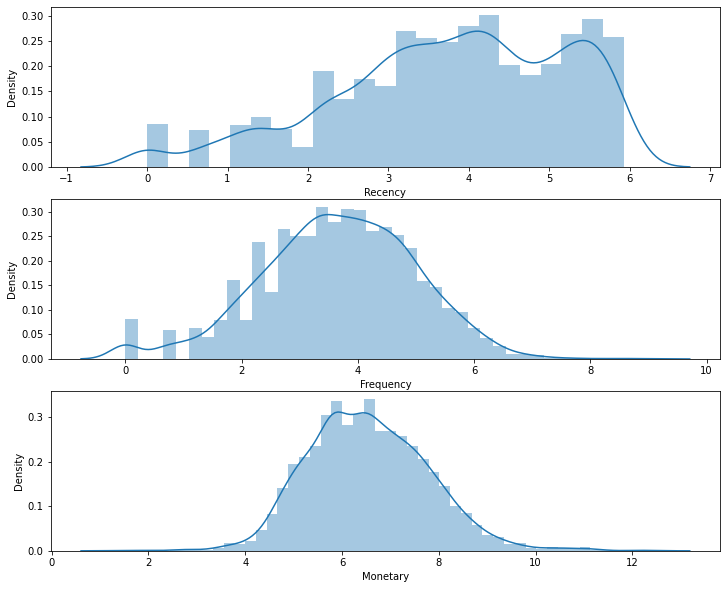

In [180]:
plt.figure(figsize=(12,10))

plt.subplot(3, 1, 1); sns.distplot(df_rfm_log['Recency'])
plt.subplot(3, 1, 2); sns.distplot(df_rfm_log['Frequency'])
plt.subplot(3, 1, 3); sns.distplot(df_rfm_log['Monetary'])
plt.show()

<AxesSubplot:>

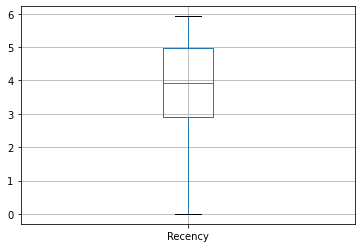

In [181]:
df_rfm_log.boxplot(column='Recency')

<AxesSubplot:>

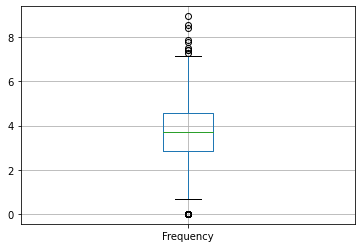

In [182]:
df_rfm_log.boxplot(column='Frequency')

<AxesSubplot:>

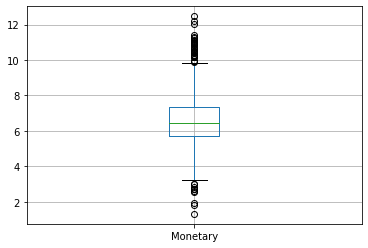

In [183]:
df_rfm_log.boxplot(column='Monetary')

Si può notare che la trasformazione logaritmica ha reso le distribuzioni simmetriche che possono essere considerate come delle distribuzioni normali. 

In [184]:
df_rfm_log.loc[:,'Recency':'Monetary'].describe()

,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000
mean,3.763997,3.653225,6.537687
std,1.433715,1.332604,1.247878
min,0.000000,0.000000,1.321756
25%,2.890372,2.833213,5.697714
50%,3.931826,3.688879,6.469211
75%,4.962845,4.584967,7.359649
max,5.924256,8.945854,12.467118


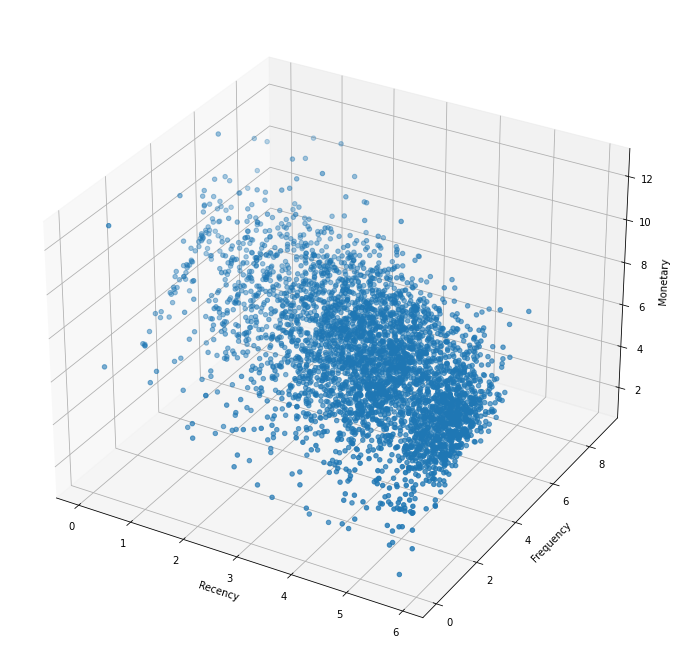

In [185]:
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_rfm_log.Recency, df_rfm_log.Frequency, df_rfm_log.Monetary)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

plt.show()

Il grafico sopra mostra la distribuzione di tutti i clienti considerando uno spazio tridimensionale i cui assi sono proprio le tre variabili RFM (ogni cliente è un punto dello spazio). Sebbene sia possibile interpretare questo grafico, il numero elevato di punti può confondere un pò l'interpretazione. Per tale motivo, si può pensare di rappresentare i clienti in un piano considerando come assi le variabili RF e rappresentando la variabile M tramite colore.

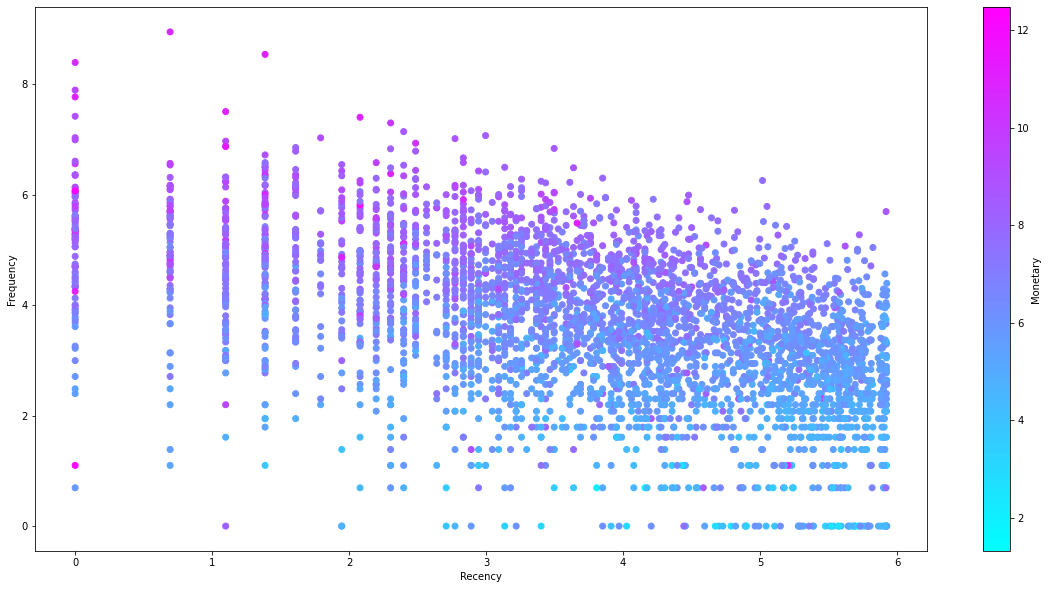

In [186]:
plt.figure(figsize=(20,10))
plt.scatter(df_rfm_log.Recency, df_rfm_log.Frequency, c=df_rfm_log.Monetary, cmap='cool')
cbar = plt.colorbar()
cbar.set_label("Monetary", labelpad=+1)
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

Si può notare che clienti con alta Recency ed bassa Frequency tendono a presentare Monetary più basse. Inoltre al decrescere della Recency e al crescere della Frequency si ottiene una crescita del Monetary.  

Per confermare ciò si potrebbe pensare di attribuire un livello alla Recency, alla Frequency e al Monetary considerando i quartili per suddividere le classi di livello. Quindi per ognuno di queste variabili si può pensare di assegnare un classe che ne indica il livello. In base ai livelli di classe possono essere formati dei gruppi di clienti.

Esempio per Customer:

* Recency = 4.5 => Classe C poichè ricade nel terzo quartile 
* Frequency = 1.5 => Classe A poichè ricade nel primo quartile 
* MonetaryValue = 8.7 => Classe D poichè ricade nel quarto quartile 

Quindi tale Customer appartiene al gruppo CAD. 

In [187]:
df_rfm_log.describe()

,CustomerID,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000,3920.000000
mean,15562.059694,3.763997,3.653225,6.537687
std,1576.594671,1.433715,1.332604,1.247878
min,12346.000000,0.000000,0.000000,1.321756
25%,14208.750000,2.890372,2.833213,5.697714
50%,15569.500000,3.931826,3.688879,6.469211
75%,16913.250000,4.962845,4.584967,7.359649
max,18287.000000,5.924256,8.945854,12.467118


In [188]:
# Recency Class
df_rfm_log.loc[((df_rfm_log.Recency >= df_rfm_log.Recency.quantile(0)) & (df_rfm_log.Recency < df_rfm_log.Recency.quantile(.25))),'Recency_Class'] = 'D'
df_rfm_log.loc[((df_rfm_log.Recency >= df_rfm_log.Recency.quantile(.25)) & (df_rfm_log.Recency < df_rfm_log.Recency.quantile(.50))),'Recency_Class'] = 'C'
df_rfm_log.loc[((df_rfm_log.Recency >= df_rfm_log.Recency.quantile(.50)) & (df_rfm_log.Recency < df_rfm_log.Recency.quantile(.75))),'Recency_Class'] = 'B'
df_rfm_log.loc[((df_rfm_log.Recency >= df_rfm_log.Recency.quantile(.75)) & (df_rfm_log.Recency < df_rfm_log.Recency.quantile(1))),'Recency_Class'] = 'A'

# Frequency Class
df_rfm_log.loc[((df_rfm_log.Frequency >= df_rfm_log.Frequency.quantile(0)) & (df_rfm_log.Frequency < df_rfm_log.Frequency.quantile(.25))),'Frequency_Class'] = 'A'
df_rfm_log.loc[((df_rfm_log.Frequency >= df_rfm_log.Frequency.quantile(.25)) & (df_rfm_log.Frequency < df_rfm_log.Frequency.quantile(.50))),'Frequency_Class'] = 'B'
df_rfm_log.loc[((df_rfm_log.Frequency >= df_rfm_log.Frequency.quantile(.50)) & (df_rfm_log.Frequency < df_rfm_log.Frequency.quantile(.75))),'Frequency_Class'] = 'C'
df_rfm_log.loc[((df_rfm_log.Frequency >= df_rfm_log.Frequency.quantile(.75)) & (df_rfm_log.Frequency < df_rfm_log.Frequency.quantile(1))),'Frequency_Class'] = 'D'

# Monetary Class
df_rfm_log.loc[((df_rfm_log.Monetary >= df_rfm_log.Monetary.quantile(0)) & (df_rfm_log.Monetary < df_rfm_log.Monetary.quantile(.25))),'Monetary_Class'] = 'A'
df_rfm_log.loc[((df_rfm_log.Monetary >= df_rfm_log.Monetary.quantile(.25)) & (df_rfm_log.Monetary < df_rfm_log.Monetary.quantile(.50))),'Monetary_Class'] = 'B'
df_rfm_log.loc[((df_rfm_log.Monetary >= df_rfm_log.Monetary.quantile(.50)) & (df_rfm_log.Monetary < df_rfm_log.Monetary.quantile(.75))),'Monetary_Class'] = 'C'
df_rfm_log.loc[((df_rfm_log.Monetary >= df_rfm_log.Monetary.quantile(.75)) & (df_rfm_log.Monetary < df_rfm_log.Monetary.quantile(1))),'Monetary_Class'] = 'D'

In [189]:
df_rfm_log.head()

,CustomerID,Recency,Frequency,Monetary,Recency_Class,Frequency_Class,Monetary_Class
0,12346,5.786897,0.000000,11.253942,A,A,D
1,12747,0.693147,4.634729,8.341889,D,D,D
2,12748,0.000000,8.392083,10.405873,D,D,D
3,12749,1.386294,5.293305,8.316515,D,D,D
4,12820,1.098612,4.077537,6.848366,D,C,C


In [190]:
df_rfm_log['RFM_Class'] = df_rfm_log.Recency_Class + df_rfm_log.Frequency_Class + df_rfm_log.Monetary_Class

In [191]:
df_rfm_log.head()

,CustomerID,Recency,Frequency,Monetary,Recency_Class,Frequency_Class,Monetary_Class,RFM_Class
0,12346,5.786897,0.000000,11.253942,A,A,D,AAD
1,12747,0.693147,4.634729,8.341889,D,D,D,DDD
2,12748,0.000000,8.392083,10.405873,D,D,D,DDD
3,12749,1.386294,5.293305,8.316515,D,D,D,DDD
4,12820,1.098612,4.077537,6.848366,D,C,C,DCC


Avendo 3 variabili e 4 classi si ha che il numero totale di possibili gruppi è pari a 64. Per ogni gruppo calcoliamo il centroide che viene rappresentato come la media calcolata su ogni variabile. Si noti che 3 su 64 non riescono a formarsi in quanto non si verificano le combinazioni tra le lettere delle tre variabili. Per tale motivo, si hanno 61 gruppi in totale.

In [192]:
df_classes = df_rfm_log.groupby(['RFM_Class'], as_index=True).agg(
    {'Recency': 'mean',
     'Frequency': 'mean',
     'Monetary': 'mean',
     'CustomerID': 'count'}).rename(columns = {'CustomerID': 'Count'})
 
df_classes.sort_values(by=['Monetary'])

,Recency,Frequency,Monetary,Count
RFM_Class,,,,
AAA,5.514614,1.813746,4.887232,329
BAA,4.393448,1.915009,4.950373,164
CAA,3.397805,1.984640,4.973183,106
DAA,2.020368,1.856693,5.013247,54
CBA,3.420046,3.247161,5.189301,60
...,...,...,...,...
DCD,1.855528,4.273254,7.942427,76
CDD,3.376959,5.299262,8.090599,187
DDD,1.611330,5.544389,8.434969,402


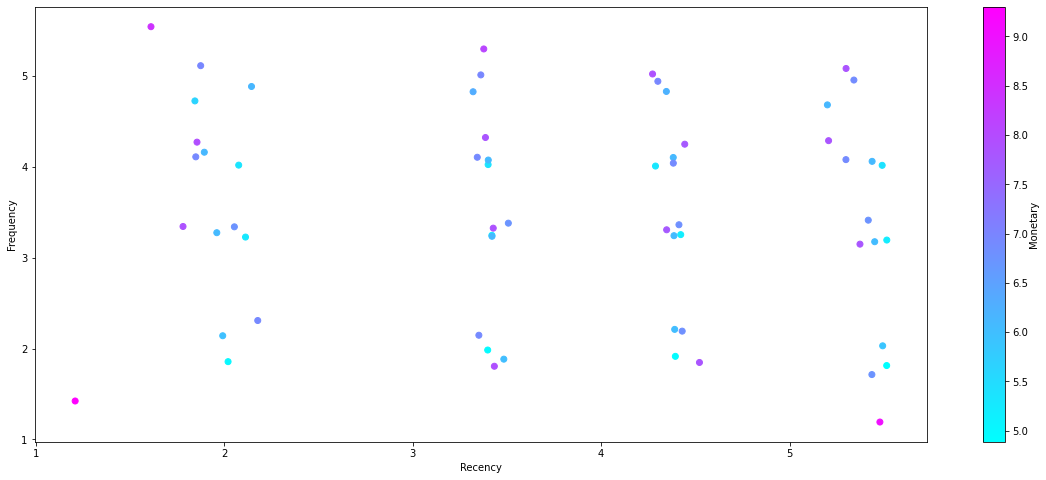

In [193]:
plt.figure(figsize=(20,8))
plt.scatter(df_classes.Recency, df_classes.Frequency, c=df_classes.Monetary, cmap='cool')
cbar = plt.colorbar()
cbar.set_label("Monetary", labelpad=+1)
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

Si può notare che i centroidi dei gruppi possono essere raggrupati a loro volta in circa 16 gruppi (individuabili tramite una sorta di griglia). Per ogni gruppo si può notare in genere che fissata la Recency, il centroide con maggiore Monetary è quello che presenta la Frequency più alta. Inoltre è interessate notare i due outlier posizionati rispettivamente in basso a sinistra e in basso a destra. Il primo mostra che per valori bassi di Recency e Frequency si ha un Monetary molto alto (quasi il massimo). Il secondo mostra che per valori di Recency alti e Frequency bassi abbiamo un Monetary molto alto. 

Da questa analisi preliminare possimo ottenere le seguenti deduzioni: 
* I clienti potrebbero essere inizialmente raggruppati in circa 16 gruppi, senza considerare i due outlier sopra descritti.
* In ogni gruppo i clienti che hanno comportano maggiore valore monetario sono generalmente quelli che hanno una Frequency più alta.
* La Frequency massima però è data dai due outlier che ci suggeriscono che clienti con una scarsa frequenza di acquisto sono quelli che comportano maggiore valore monetario, e ciò potrebbe essere dovuto ad un'unica corposa transazione in termini di soldi spesi per l'acquisto. Si osserva, inoltre, che tale fenomeno avviene solo per quei clienti che hanno acquistato più recentemente o per quelli che non acquistano da tempo (ciò potrebbe spiegare il livello di Frequency così basso: cioè un cliente che ha fatto un acquisto recentemente potrebbe essere lo stesso che un anno fa ha fatto un acquisto oneroso). Probabilmente questa categoria di clienti è in numero inferiore rispetto alle altre categorie. 

<BarContainer object of 61 artists>

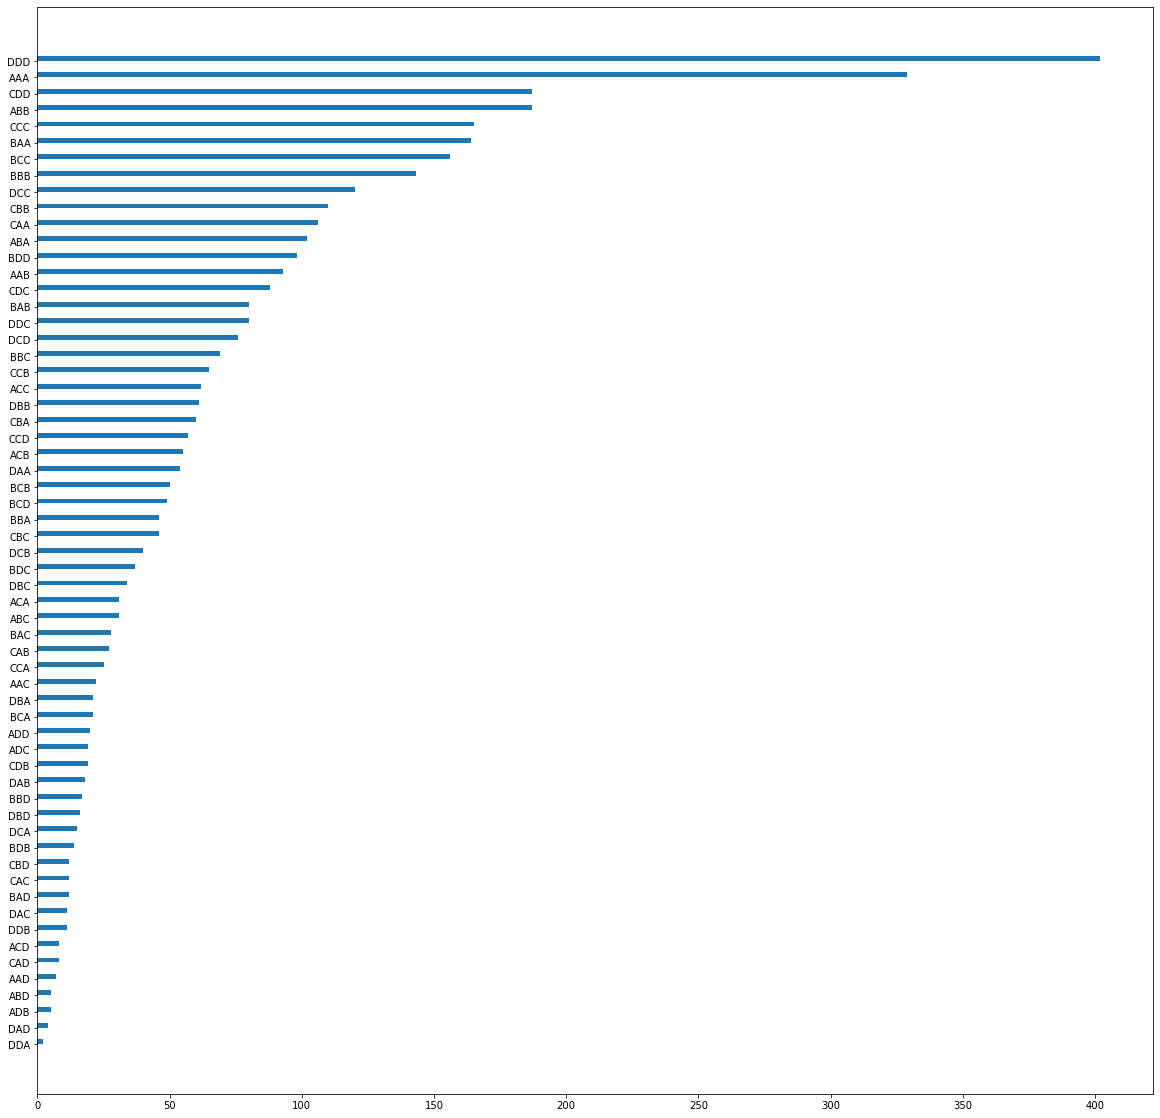

In [194]:
df_classes = df_classes.sort_values(by=['Count'])
plt.figure(figsize=(20, 20))  
plt.barh(df_classes.index, df_classes.Count, align='edge', height=0.3)

Il grafico sopra dimostra che i gruppi sono sproporzionati in numero. Quindi si può provare a considerare solo i gruppi più numerosi e verificare la presenza degli outlier descritti in precedenza.

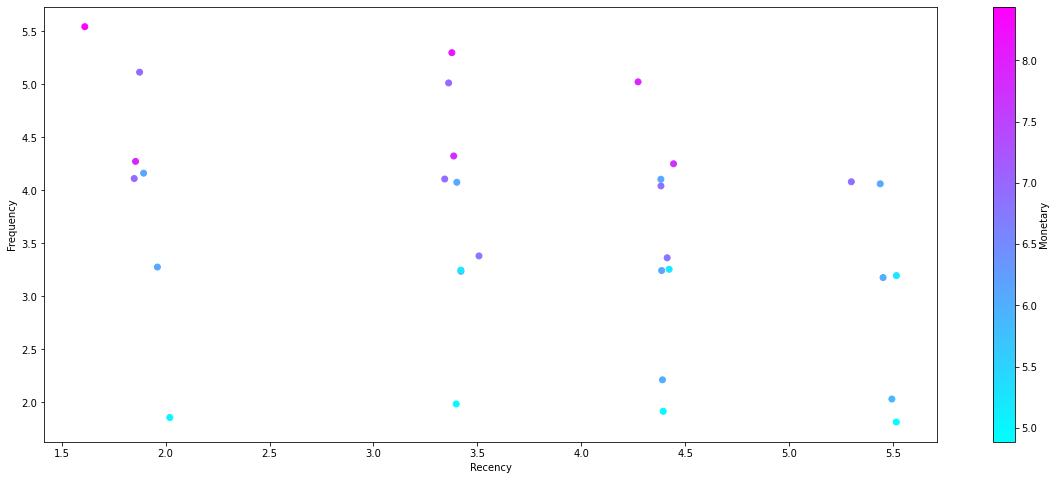

In [195]:
df_classes = df_classes.sort_values(by=['Count'], ascending=False)
plt.figure(figsize=(20,8))
plt.scatter(df_classes.head(31).Recency, df_classes.head(31).Frequency, c=df_classes.head(31).Monetary, cmap='cool')
cbar = plt.colorbar()
cbar.set_label("Monetary", labelpad=+1)
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

Considerando i primi 30 gruppi per numerosità si può notare che gli outlier scompaiono. Ciò dimostra che gli outlier descritti in precedenza rappresentano un numero di clienti basso rispetto gli altri gruppi (come ipotizzato in precedenza). Inoltre, in questo grafico notare meglio come il valore Monetario cresce all'aumentare della Frequency! 

In questa analisi preliminare, però, si è data importanza principalmente al Monetary. In realtà, la RFM Segmentation classifica i clienti sulla base di un punteggio che dipende dalle tre variabili in gioco. Per tale motivo, è possibile raggruppare i clienti in 10 gruppi sulla base di un punteggio totale che è dato dalla somma dei singoli punteggio ottenuti per le tre variabili. 

Ad esempio: un cliente che appartiene alla classe ACD avrà un punteggio pari a 1+3+4=8 (perchè A=1, B=2, C=3, D=4).

In [196]:
df_rfm_log[['Recency_Class', 'Frequency_Class', 'Monetary_Class']] = df_rfm_log[['Recency_Class', 'Frequency_Class', 'Monetary_Class']].replace('A', 1)
df_rfm_log[['Recency_Class', 'Frequency_Class', 'Monetary_Class']] = df_rfm_log[['Recency_Class', 'Frequency_Class', 'Monetary_Class']].replace('B', 2)
df_rfm_log[['Recency_Class', 'Frequency_Class', 'Monetary_Class']] = df_rfm_log[['Recency_Class', 'Frequency_Class', 'Monetary_Class']].replace('C', 3)
df_rfm_log[['Recency_Class', 'Frequency_Class', 'Monetary_Class']] = df_rfm_log[['Recency_Class', 'Frequency_Class', 'Monetary_Class']].replace('D', 4)

In [197]:
df_rfm_log.head()

,CustomerID,Recency,Frequency,Monetary,Recency_Class,Frequency_Class,Monetary_Class,RFM_Class
0,12346,5.786897,0.000000,11.253942,1.0,1.0,4.0,AAD
1,12747,0.693147,4.634729,8.341889,4.0,4.0,4.0,DDD
2,12748,0.000000,8.392083,10.405873,4.0,4.0,4.0,DDD
3,12749,1.386294,5.293305,8.316515,4.0,4.0,4.0,DDD
4,12820,1.098612,4.077537,6.848366,4.0,3.0,3.0,DCC


In [198]:
df_rfm_log['RFM_Score'] = df_rfm_log['Recency_Class'] + df_rfm_log['Frequency_Class'] + df_rfm_log['Monetary_Class']

In [199]:
df_rfm_log.head()

,CustomerID,Recency,Frequency,Monetary,Recency_Class,Frequency_Class,Monetary_Class,RFM_Class,RFM_Score
0,12346,5.786897,0.000000,11.253942,1.0,1.0,4.0,AAD,6.0
1,12747,0.693147,4.634729,8.341889,4.0,4.0,4.0,DDD,12.0
2,12748,0.000000,8.392083,10.405873,4.0,4.0,4.0,DDD,12.0
3,12749,1.386294,5.293305,8.316515,4.0,4.0,4.0,DDD,12.0
4,12820,1.098612,4.077537,6.848366,4.0,3.0,3.0,DCC,10.0


In [200]:
df_scores = df_rfm_log.groupby(['RFM_Score'], as_index=True).agg(
    {'Recency': 'mean',
     'Frequency': 'mean',
     'Monetary': 'mean',
     'CustomerID': 'count'}).rename(columns = {'CustomerID': 'Count'})
df_scores

,Recency,Frequency,Monetary,Count
RFM_Score,,,,
3.0,5.514614,1.813746,4.887232,329
4.0,4.997098,2.308827,5.270695,359
5.0,4.711669,2.740368,5.708906,472
6.0,4.119672,3.035127,5.924129,426
7.0,3.961228,3.446030,6.359977,389
8.0,3.681266,3.817665,6.628485,420
9.0,3.383973,4.181691,6.994858,382
10.0,3.029437,4.565775,7.330560,390
11.0,2.689545,5.028986,7.795011,343


Raggruppando i clienti per RFM_Score e calcolando i centroidi si ottengono 10 gruppi proporzionati tra loro (a differenza di quanto visto in precedenza con i 61 gruppi). 

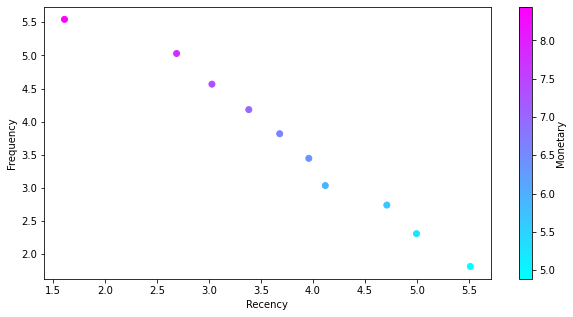

In [201]:
plt.figure(figsize=(10,5))
plt.scatter(df_scores.Recency, df_scores.Frequency, c=df_scores.Monetary, cmap='cool')
cbar = plt.colorbar()
cbar.set_label("Monetary", labelpad=+1)
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

Effettuando un'analisi simile a quella fatta in precedenza, si può notare che al crescere della Frequency e al decrescere della Recency aumenta il valore di Monetary. Ciò rafforza quanto visto nella precedente analisi in cui si osservava che al crescere della Frequency si otteneva un aumento del Monetary. Quì, inoltre, notiamo che al decrescere della Recency decresce il Monetary. Da questo grafico è possibile evidenziare 3 o 4 sottogruppi in cui abbiamo, ad esempio, in alto i client con alto valore monetario (Top Customers), al centro quelli con medio valore monetario e in basso quelli con basso valore monetario (Worst Customers). 

* Top Level = Clienti abituali e frequenti
* Middle Level = Clienti non abituali e meno frequenti rispetto ai top
* Low Level = Clienti non attratti

## Clustering K-Means

L'analisi fatta in precedenza si basa su semplici evidenze mostrate dai dati e su intuizioni. Una scelta saggia, a questo punto, sarebbe quella di adoperare un algoritmo di clustering come il k-Means avendo, però, già un'idea di base di quali e quanti gruppi si potrebbero ottenere. 

L'algortimo k-Means inoltre sicuramente aiuta a trovare dei gruppi che presentano caratteristiche comuni che possono essere sinteticamente rappresentare dai centroidi. Analizzando i valori di Recency, Frequency e Monetary dei centroidi è possibile dare un significato specifico ai gruppi. 

In [202]:
from sklearn.cluster import KMeans

data = df_rfm_log[['Recency','Frequency','Monetary']].to_numpy()
sse = {}

for k in range(1, 16):
    kmeans = KMeans(n_clusters=k, random_state=5)
    kmeans.fit(data)
    sse[k] = kmeans.inertia_

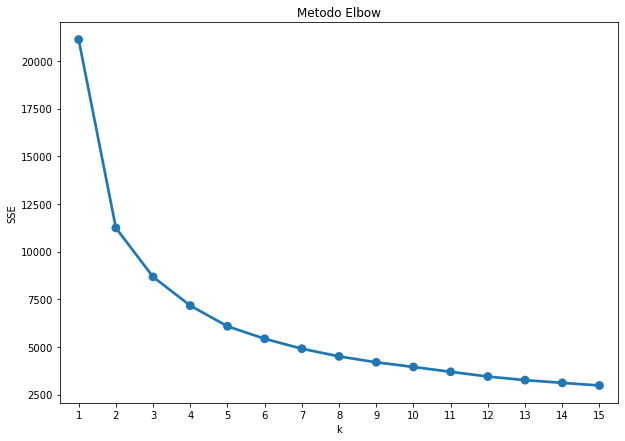

In [203]:
plt.figure(figsize=(10,7))
plt.title('Metodo Elbow')
plt.xlabel('k'); 
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

## K=3

In [204]:
kmeans = KMeans(n_clusters=3, random_state=5)
predictions = kmeans.fit_predict(data)

df_rfm_log['3-Means Clustering Index'] = predictions

df_3_means = df_rfm_log.groupby(['3-Means Clustering Index'], as_index=True).agg(
    {'Recency': 'mean',
     'Frequency': 'mean',
     'Monetary': 'mean',
     'CustomerID': 'count'}).rename(columns = {'CustomerID': 'Count'})
df_3_means

,Recency,Frequency,Monetary,Count
3-Means Clustering Index,,,,
0,3.791210,4.016088,6.770546,1661
1,1.855252,5.097524,7.972994,830
2,4.841014,2.392563,5.433360,1429


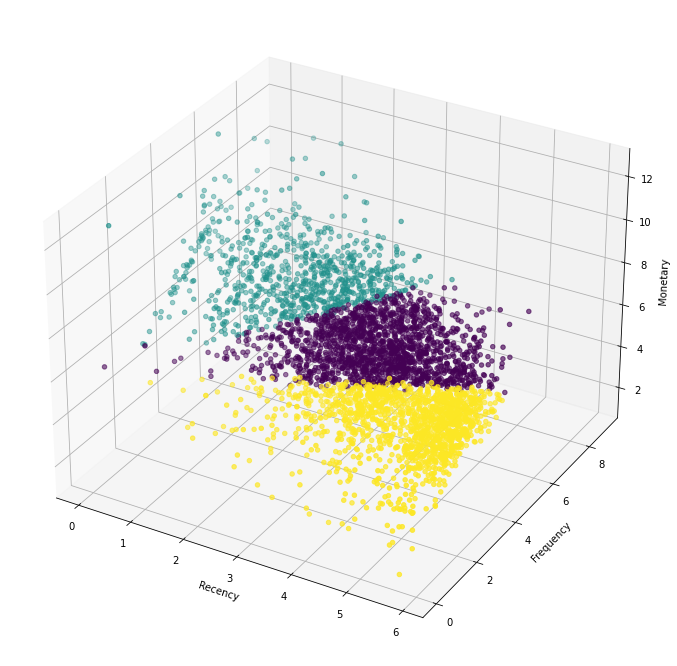

In [205]:
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_rfm_log.Recency, df_rfm_log.Frequency, df_rfm_log.Monetary, c=df_rfm_log['3-Means Clustering Index'])
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

plt.show()

## K=4

In [206]:
kmeans = KMeans(n_clusters=4, random_state=5)
predictions = kmeans.fit_predict(data)

df_rfm_log['4-Means Clustering Index'] = predictions

df_4_means = df_rfm_log.groupby(['4-Means Clustering Index'], as_index=True).agg(
    {'Recency': 'mean',
     'Frequency': 'mean',
     'Monetary': 'mean',
     'CustomerID': 'count'}).rename(columns = {'CustomerID': 'Count'})
df_4_means

,Recency,Frequency,Monetary,Count
4-Means Clustering Index,,,,
0,2.951363,3.101354,5.891730,781
1,4.104370,4.299313,7.081352,1212
2,5.148910,2.406382,5.455472,1194
3,1.811132,5.203950,8.089848,733


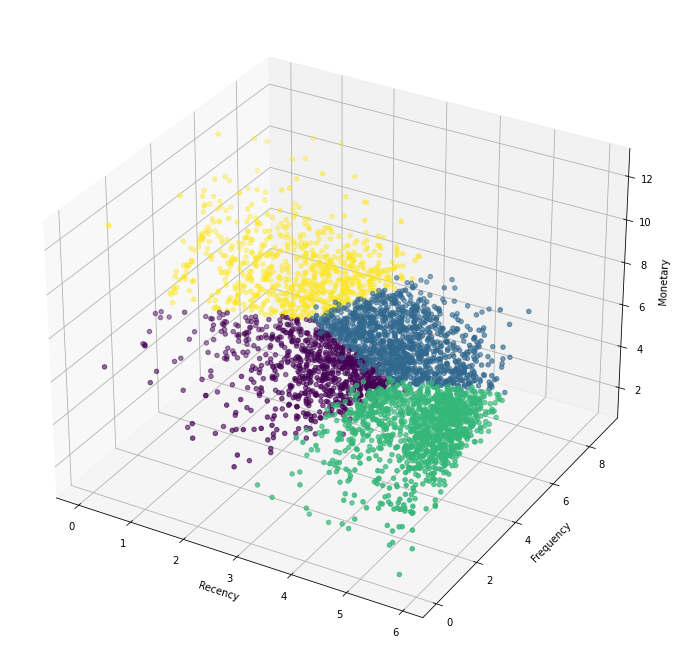

In [207]:
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_rfm_log.Recency, df_rfm_log.Frequency, df_rfm_log.Monetary, c=df_rfm_log['4-Means Clustering Index'])
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

plt.show()

## K=5

In [208]:
kmeans = KMeans(n_clusters=5, random_state=5)
predictions = kmeans.fit_predict(data)

df_rfm_log['5-Means Clustering Index'] = predictions

df_5_means = df_rfm_log.groupby(['5-Means Clustering Index'], as_index=True).agg(
    {'Recency': 'mean',
     'Frequency': 'mean',
     'Monetary': 'mean',
     'CustomerID': 'count'}).rename(columns = {'CustomerID': 'Count'})
df_5_means

,Recency,Frequency,Monetary,Count
5-Means Clustering Index,,,,
0,1.562091,5.295275,8.211745,571
1,4.968160,3.308585,6.080601,1080
2,3.727459,4.609245,7.384473,958
3,2.737170,3.290967,6.062477,690
4,4.891707,1.670441,5.015044,621


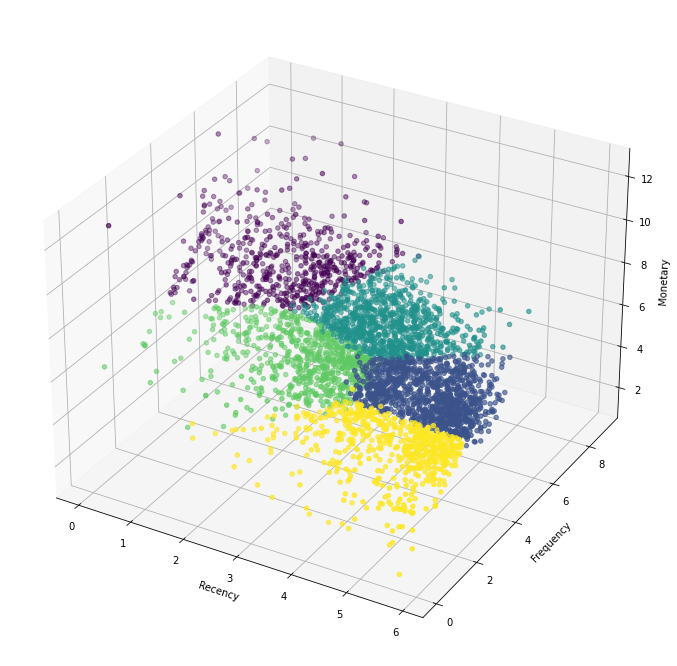

In [209]:
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_rfm_log.Recency, df_rfm_log.Frequency, df_rfm_log.Monetary, c=df_rfm_log['5-Means Clustering Index'])
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

plt.show()

## Conclusioni

Dai risultati ottenuti dall'algoritmo k-means è possibile affermare che un numero sub-ottimale di gruppi è pari a 4 (come ipotizzato dall'analisi fatta in precedenza). Per k=3 si ottiene comunque una buona separazione dei clienti, ma i gruppi risultano essere più sproporzionati in numero.

In [210]:
df_4_means

,Recency,Frequency,Monetary,Count
4-Means Clustering Index,,,,
0,2.951363,3.101354,5.891730,781
1,4.104370,4.299313,7.081352,1212
2,5.148910,2.406382,5.455472,1194
3,1.811132,5.203950,8.089848,733


* __Nuovi Clienti__ (cluster 0): clienti che hanno una bassa frequenza di acquisto, la cui ultima transazione è abbastanza recente. Il valore monetario basso giustifica la loro posizione di nuovi clienti. 

* __Clienti da tenere d'occhio__ (cluster 1): clienti importanti (alto valore monetario e frequenza) che però non acquistano da tempo. 

* __Probabili Clienti Persi / Clienti occasionali__ (cluster 2): clienti che hanno una frequenza di acquisto bassa, la cui ultima transazione non è per niente recente. Ciò si riflette anche sul valore monetario basso (il più basso dei quattro gruppi).

* __Migliori_Clienti__ (cluster 3): clienti con la più alta frequenza d'acquisto e valore monetario, i cui ultimi acquisti sono stati fatti recentemente